In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = models.Sequential([
    layers.Input(shape=(32*32*3,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2773 - loss: 1.9894 - val_accuracy: 0.3112 - val_loss: 1.9145
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3964 - loss: 1.6980 - val_accuracy: 0.4100 - val_loss: 1.6460
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4330 - loss: 1.6041 - val_accuracy: 0.4517 - val_loss: 1.5514
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4560 - loss: 1.5343 - val_accuracy: 0.4416 - val_loss: 1.5698
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4715 - loss: 1.4894 - val_accuracy: 0.4587 - val_loss: 1.5124
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4906 - loss: 1.4412 - val_accuracy: 0.4827 - val_loss: 1.4496
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4983 - loss: 1.4099 - val_accuracy: 0.4645 - val_loss: 1.4726
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5111 - loss: 1.3700 - 

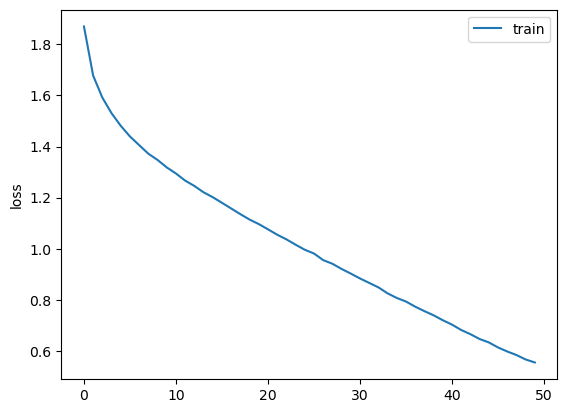

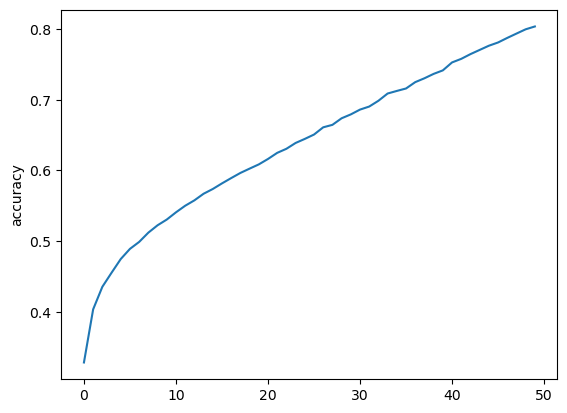

In [26]:
plt.plot(history.history['loss'], label = 'train')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train')
plt.ylabel('accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


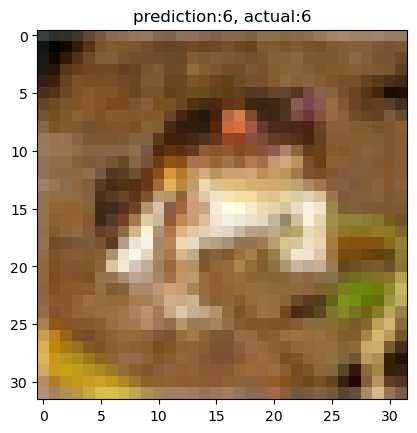

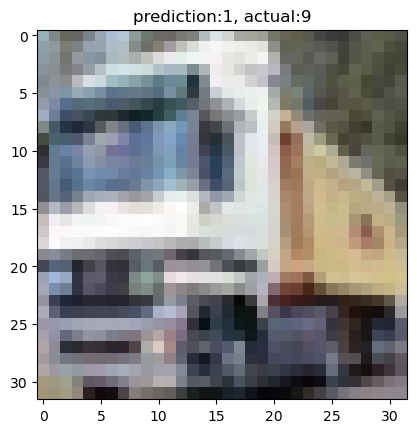

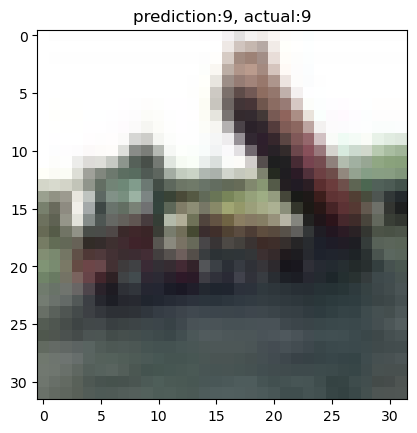

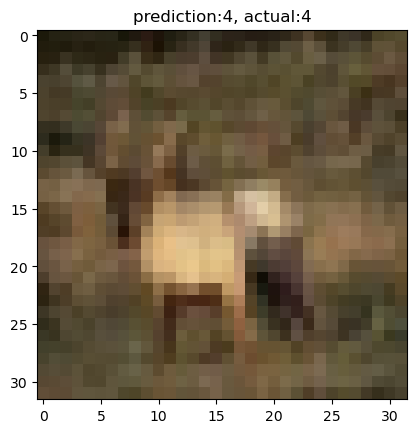

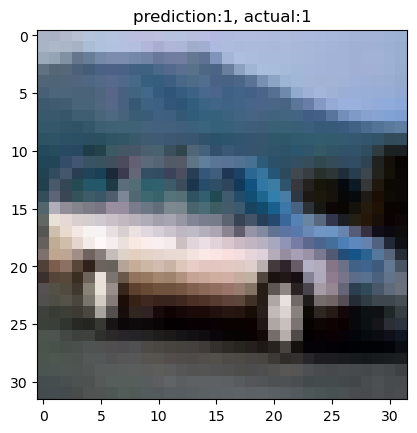

In [9]:
prob = model.predict(x_train[:5])
pred = np.argmax(prob, axis=1)

for i in range(5):
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("prediction:{}, actual:{}".format(pred[i], np.argmax(y_train[i])))
    plt.show()

In [24]:
model.evaluate(x_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.6823


[0.6930510401725769, 0.7493199706077576]